# Objective

**Avocado Prices**

In which cities can millenials have their avocado toast AND buy a home?

Data: https://www.kaggle.com/datasets/neuromusic/avocado-prices

**Data Explanaion:**

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

|  Date | The date of the observation |
| :---: | :-------------------------: |
| AveragePrice| the average price of a single avocado |
| type | conventional or organic |
| year | the year |
| Region | the city or region of the observation |
| Total Volume | Total number of avocados sold |
| 4046 | Total number of avocados with PLU 4046 sold |
| 4225 | Total number of avocados with PLU 4225 sold |
| 4770 | Total number of avocados with PLU 4770 sold |

# Setup

In [41]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

## Read the Data

In [2]:
df = pd.read_csv("../data/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Notes:**
* Delete column```Unnamed``` 
* Make column names consistent: lower case and no spaces
* No missing values
* ```type``` and ```region``` are categorical variables
* ```Average Price``` is variable to predict
* Sort dataframe for ```Date``` 

In [8]:
df["Date"].nunique()

169

In [7]:
df = df.sort_values(by="Date").reset_index()
df.head()

,index,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
2,11777,51,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
3,675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
4,1247,51,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville


In [9]:
# delete "Unnamed"
del df["Unnamed: 0"]

In [10]:
# Make column names consistent: lower case and no spaces
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [11]:
df.head()

,index,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,11829,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
2,11777,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
3,675,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
4,1247,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville


In [12]:
# define categorical and numerical columns
categorical = ["type", "region"]
numerical =  ["total_volume", "4046", "4225", "4770", "total_bags","small_bags", "xlarge_bags", "year"]              

In [13]:
# How many types and regions are there?
print("type:\t", len(df["type"].unique()))
print("region:\t", len(df["region"].unique()))

type:	 2
region:	 54


In [14]:
df["region"].unique()

array(['Southeast', 'TotalUS', 'Tampa', 'Denver', 'Louisville',
       'HartfordSpringfield', 'Charlotte', 'Portland', 'Nashville',
       'Columbus', 'Sacramento', 'NewOrleansMobile', 'SanDiego',
       'LosAngeles', 'GreatLakes', 'PhoenixTucson', 'Indianapolis',
       'Philadelphia', 'Detroit', 'Jacksonville', 'RichmondNorfolk',
       'BuffaloRochester', 'Northeast', 'SouthCarolina', 'West',
       'California', 'NewYork', 'HarrisburgScranton',
       'NorthernNewEngland', 'Boston', 'Plains', 'Orlando', 'Roanoke',
       'Midsouth', 'Seattle', 'WestTexNewMexico', 'SanFrancisco',
       'CincinnatiDayton', 'Albany', 'GrandRapids', 'Houston', 'Syracuse',
       'Spokane', 'StLouis', 'DallasFtWorth', 'LasVegas', 'Atlanta',
       'Boise', 'Pittsburgh', 'Chicago', 'SouthCentral',
       'MiamiFtLauderdale', 'RaleighGreensboro', 'BaltimoreWashington'],
      dtype=object)

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("unique values:", df[col].nunique())
    if df[col].dtype == "float64":
        print("mean:", df[col].mean())
    print()

index
[11569 11829 11777   675  1247]
unique values: 18249

date
['2015-01-04' '2015-01-11' '2015-01-18' '2015-01-25' '2015-02-01']
unique values: 169

averageprice
[1.75 1.46 1.7  0.99 0.92]
unique values: 259
mean: 1.4059784097758843

total_volume
[ 27365.89 612910.15   1885.48 668086.   101162.98]
unique values: 18237
mean: 850644.0130089285

4046
[  9307.34 233286.13    748.62 117454.09   1991.63]
unique values: 17702
mean: 293008.42453066056

4225
[3.8448100e+03 2.1661120e+05 3.0190000e+01 4.2951841e+05 7.5090160e+04]
unique values: 18103
mean: 295154.5683560727

4770
[ 615.28 4370.99    0.   5553.6   283.88]
unique values: 12071
mean: 22839.735992657286

total_bags
[ 13598.46 158641.83   1106.67 115559.9   23797.31]
unique values: 18097
mean: 239639.20205983974

small_bags
[ 13061.1  115068.71   1106.67  67894.33   7769.36]
unique values: 17321
mean: 182194.68669570945

large_bags
[  537.36 43573.12     0.   47661.52 16027.95]
unique values: 15082
mean: 54338.08814455605

xlarge_

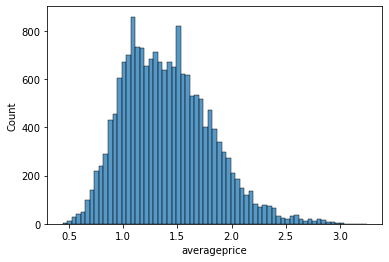

In [16]:
# plot histogram of price
sns.histplot(df["averageprice"]);

**Notes:**
* The price is close to a normal distribution (no long tail), data does not need to be transformed

## Data Preparation
* Define train, valiidation and test splits
* Seperate the price variable

In [17]:
# train, val, test split - CONSIDER TIME
df_train_full, df_test = train_test_split(df, test_size=0.2, shuffle=False, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, shuffle=False, random_state=42)

In [18]:
print(f"train_full length {len(df_train_full)}, test length {len(df_test)}")
print(f"train length {len(df_train)}, val length {len(df_val)}")

train_full length 14599, test length 3650
train length 10949, val length 3650


In [19]:
# reset index
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# define y
y_train_full = df_train_full["averageprice"].values
y_train = df_train["averageprice"].values
y_val = df_val["averageprice"].values
y_test = df_test["averageprice"].values

In [21]:
# delete "averageprice" from the dataframe
del df_train_full["averageprice"]
del df_train["averageprice"]
del df_val["averageprice"]
del df_test["averageprice"]

In [22]:
df_train.head()

,index,date,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,11569,2015-01-04,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,11829,2015-01-04,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
2,11777,2015-01-04,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
3,675,2015-01-04,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
4,1247,2015-01-04,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville


# EDA

* Consider the train and validation dataset

**The Target Variable**

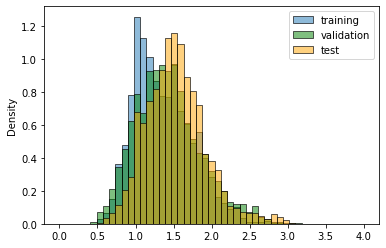

In [23]:
# plot distributions of price - train, val and test
bins = np.linspace(0,4,50)
sns.histplot(y_train, label="training", alpha=0.5, bins=bins, stat="density")
sns.histplot(y_val, color="green", label="validation", alpha=0.5, bins=bins, stat="density")
sns.histplot(y_test, color="orange", label="test", alpha=0.5, bins=bins, stat="density")
plt.legend();

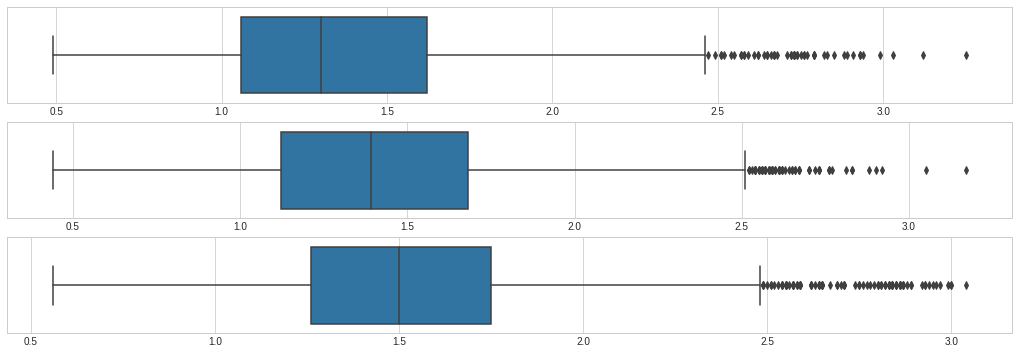

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(18, 6))
for i, n in enumerate([y_train, y_val, y_test]):
    sns.boxplot(x=n, ax=axes[i])

**Notes:**
* validation and test se have similar distributions
* train set distribution is a bit shifted compared to the others
* train, validation and test boxplots are shifted

**Some Statistics**

In [66]:
df_train[numerical].describe()

,total_volume,4046,4225,4770,total_bags,small_bags,xlarge_bags,year
count,1.094900e+04,1.094900e+04,1.094900e+04,1.094900e+04,1.094900e+04,1.094900e+04,10949.000000,10949.000000
mean,8.207791e+05,2.895306e+05,3.067854e+05,2.730969e+04,1.971534e+05,1.538418e+05,2273.267314,2015.487168
std,3.331786e+06,1.248899e+06,1.250171e+06,1.249885e+05,8.144619e+05,6.340732e+05,14729.138991,0.499858
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,8.933540e+03,9.010600e+02,2.971940e+03,0.000000e+00,2.887400e+03,1.526660e+03,0.000000,2015.000000
50%,9.453104e+04,7.748210e+03,2.885830e+04,2.502300e+02,3.057904e+04,2.048302e+04,0.000000,2015.000000
75%,4.215744e+05,1.090477e+05,1.555834e+05,9.444290e+03,9.257916e+04,7.221214e+04,24.410000,2016.000000
max,5.228870e+07,1.893304e+07,2.047057e+07,2.546439e+06,1.269811e+07,9.967538e+06,551693.650000,2016.000000


In [67]:
df_val[numerical].describe()

,total_volume,4046,4225,4770,total_bags,small_bags,xlarge_bags,year
count,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3650.000000,3650.000000
mean,9.296387e+05,3.074504e+05,2.890948e+05,1.806631e+04,3.150243e+05,2.352733e+05,4686.581975,2016.922740
std,3.748713e+06,1.326766e+06,1.170642e+06,8.008863e+04,1.232934e+06,9.323963e+05,22388.296738,0.267041
min,5.150100e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.064500e+02,0.000000e+00,0.000000,2016.000000
25%,1.344736e+04,8.535000e+02,3.516202e+03,0.000000e+00,7.145885e+03,3.802102e+03,0.000000,2017.000000
50%,1.295327e+05,9.611695e+03,3.387218e+04,1.709200e+02,5.408771e+04,3.563683e+04,0.000000,2017.000000
75%,4.652318e+05,1.220051e+05,1.457812e+05,4.288215e+03,1.389689e+05,9.962838e+04,617.857500,2017.000000
max,6.103446e+07,2.274362e+07,2.032816e+07,1.664383e+06,1.629830e+07,1.256716e+07,377661.060000,2017.000000


**Boxplots of numerical Variables**

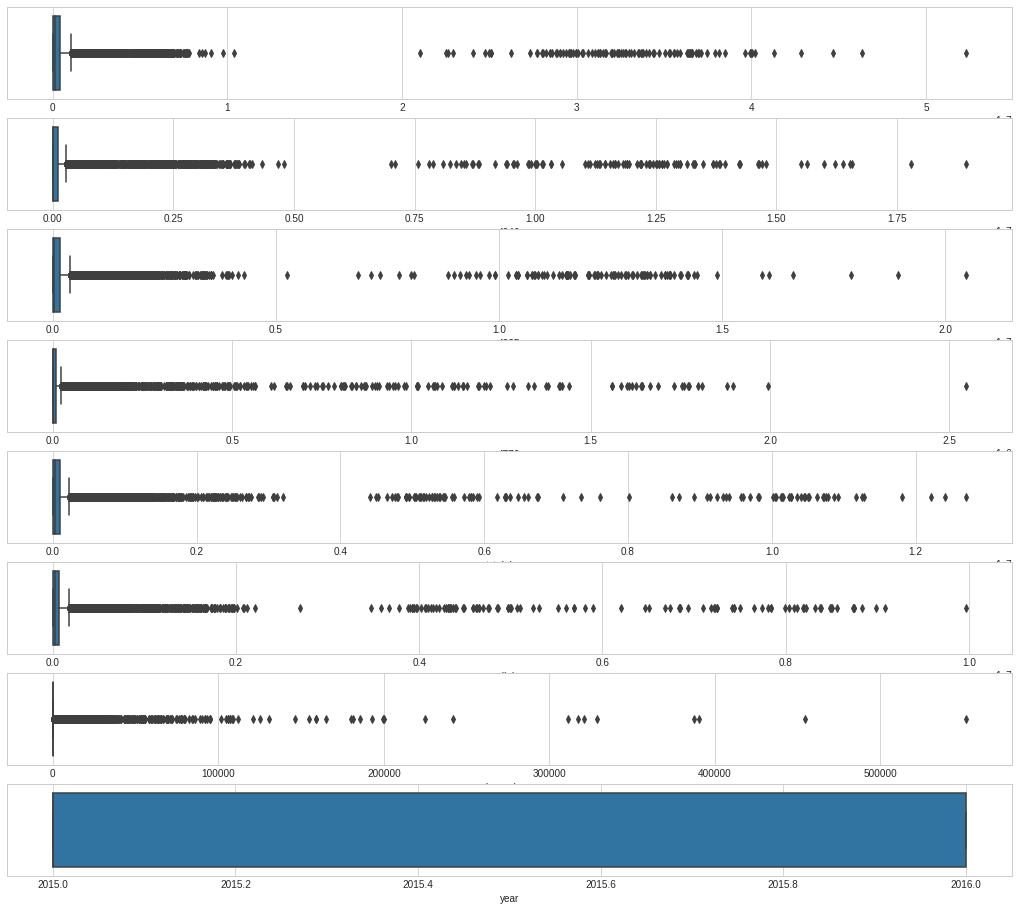

In [128]:
# Boxplots of numerical variables
fig, axes = plt.subplots(len(numerical), 1, figsize=(18, 2*len(numerical)))
for i, n in enumerate(numerical):
    sns.boxplot(x=df_train[n], ax=axes[i])

**Notes:**
* All numerical variables have a lot of large outliers to te right 

**Correlations in training data**

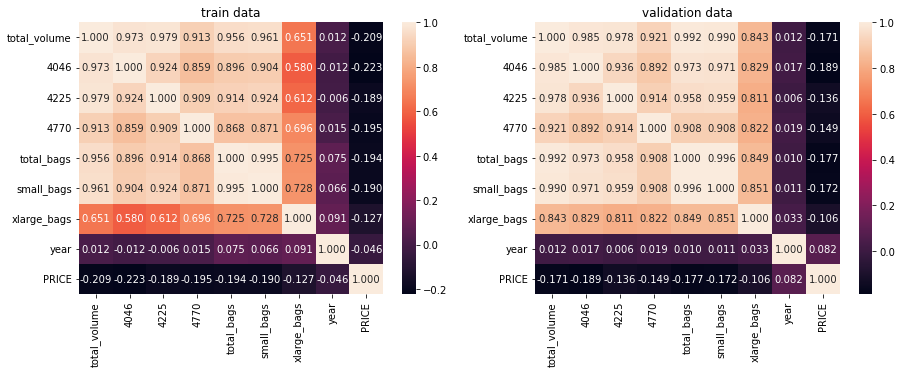

In [24]:
# correlation matrix 
fig, axes = plt.subplots(1, 2, figsize=(15,5))
df_train_y = pd.concat([df_train[numerical], pd.DataFrame(y_train, columns=["PRICE"])], axis=1)
sns.heatmap(df_train_y.corr(), annot=True, fmt=".3f", ax=axes[0])
axes[0].set_title("train data")
df_val_y = pd.concat([df_val[numerical], pd.DataFrame(y_val, columns=["PRICE"])], axis=1)
sns.heatmap(df_val_y.corr(), annot=True, fmt=".3f", ax=axes[1])
axes[1].set_title("validation data");

**Notes:**
* the year seems is not correlated with the other variables
* total volume is higly correlated with ```4046```, ```4225```, ```total_bags```, and ```small_bags```
* The average price ("PRICE") has low correlation with all variables

**Avocados per year**

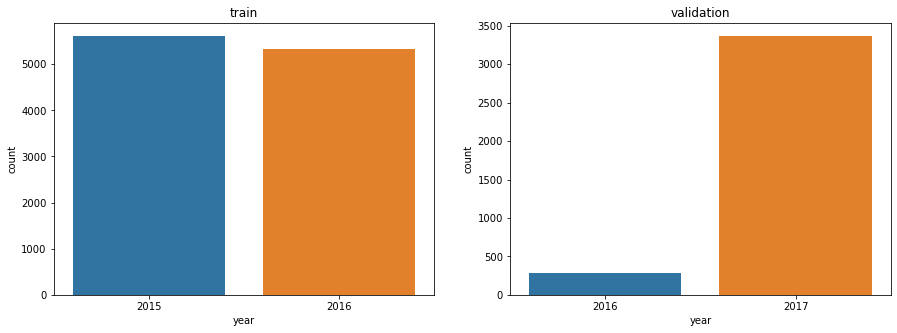

In [29]:
# Number of avocados per year
fig, axes = plt.subplots(1, 2, figsize=(15,5))
df_regions = df_train["year"].value_counts()
sns.countplot(x="year", data = df_train, ax=axes[0])
axes[0].set_title("train")

df_regions = df_val["year"].value_counts()
sns.countplot(x="year", data = df_val, ax=axes[1])
axes[1].set_title("validation");

**Notes:**
* As date only the year is given, no entire date, different prices can belong to one date, no continous time series

**Analyse ```region```**

In [30]:
# mean price per region
df_train_y = pd.concat([df_train["region"], pd.DataFrame(y_train, columns=["PRICE"])], axis=1)
df_mean_price_region = df_train_y.groupby("region").mean()
df_mean_price_region

,PRICE
region,
Albany,1.531337
Atlanta,1.300443
BaltimoreWashington,1.476601
Boise,1.261823
Boston,1.445025
BuffaloRochester,1.514039
California,1.322611
Charlotte,1.540049
Chicago,1.481626


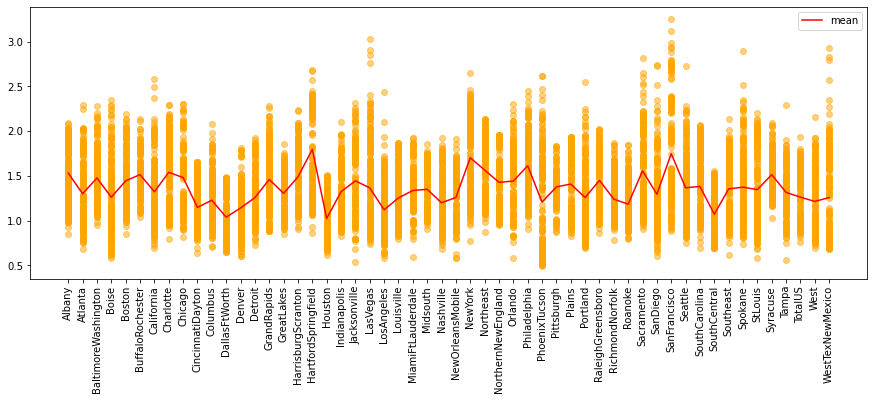

In [31]:
# price depending on region
df_train_y = pd.concat([df_train["region"], pd.DataFrame(y_train, columns=["PRICE"])], axis=1).sort_values("region")
plt.subplots(1, 1, figsize=(15,5))
plt.scatter(df_train_y["region"], df_train_y["PRICE"], alpha=0.5, c="orange")
plt.xticks(rotation=90)
plt.plot(df_mean_price_region, c="red", label="mean")
plt.legend();

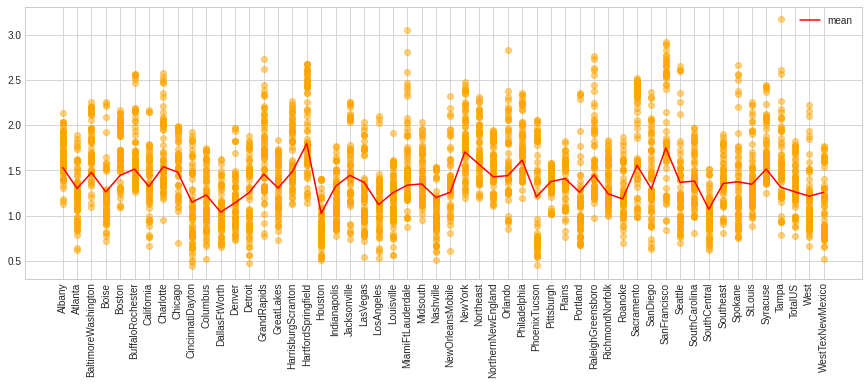

In [126]:
df_val_y = pd.concat([df_val["region"], pd.DataFrame(y_val, columns=["PRICE"])], axis=1).sort_values("region")
plt.subplots(1, 1, figsize=(15,5))
plt.scatter(df_val_y["region"], df_val_y["PRICE"], alpha=0.5, c="orange")
plt.xticks(rotation=90)
plt.plot(df_mean_price_region, c="red", label="mean")
plt.legend();

**Average Price over time per time** 

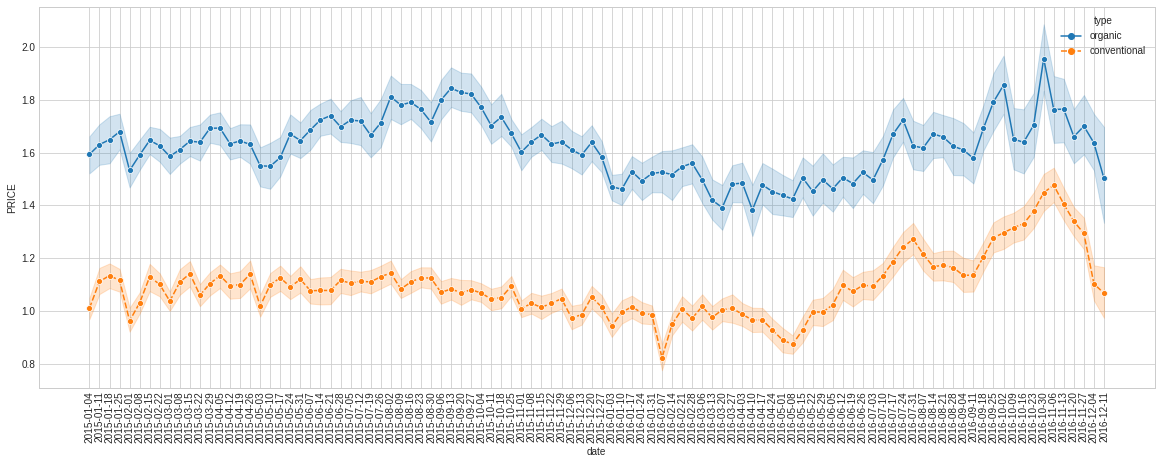

In [201]:
fig, axes = plt.subplots(1, 1, figsize=(20,7))
df_tmp = pd.concat([df_train[["date", "type"]], pd.DataFrame(y_train, columns=["PRICE"])], axis=1)
sns.lineplot(data=df_tmp, x='date', y='PRICE', hue='type', style='type', markers=['o', 'o'])
plt.xticks(rotation=90);

In [109]:
# Number of avocados per region (total_volume)
df_volume_per_region_train = df_train.groupby("region")["total_volume"].sum().sort_values(ascending=False)
df_volume_per_region_train = pd.DataFrame(df_volume_per_region_train).reset_index()
df_volume_per_region_train.head()

,region,total_volume
0,TotalUS,3.383881e+09
1,West,6.306042e+08
2,California,6.168744e+08
3,SouthCentral,5.831429e+08
4,Northeast,4.150782e+08


In [110]:
df_volume_per_region_val = df_val.groupby("region")["total_volume"].sum().sort_values(ascending=False)
df_volume_per_region_val = pd.DataFrame(df_volume_per_region_val).reset_index()
df_volume_per_region_val.head()

,region,total_volume
0,TotalUS,1.289893e+09
1,West,2.483296e+08
2,SouthCentral,2.200879e+08
3,California,2.152754e+08
4,Northeast,1.466276e+08


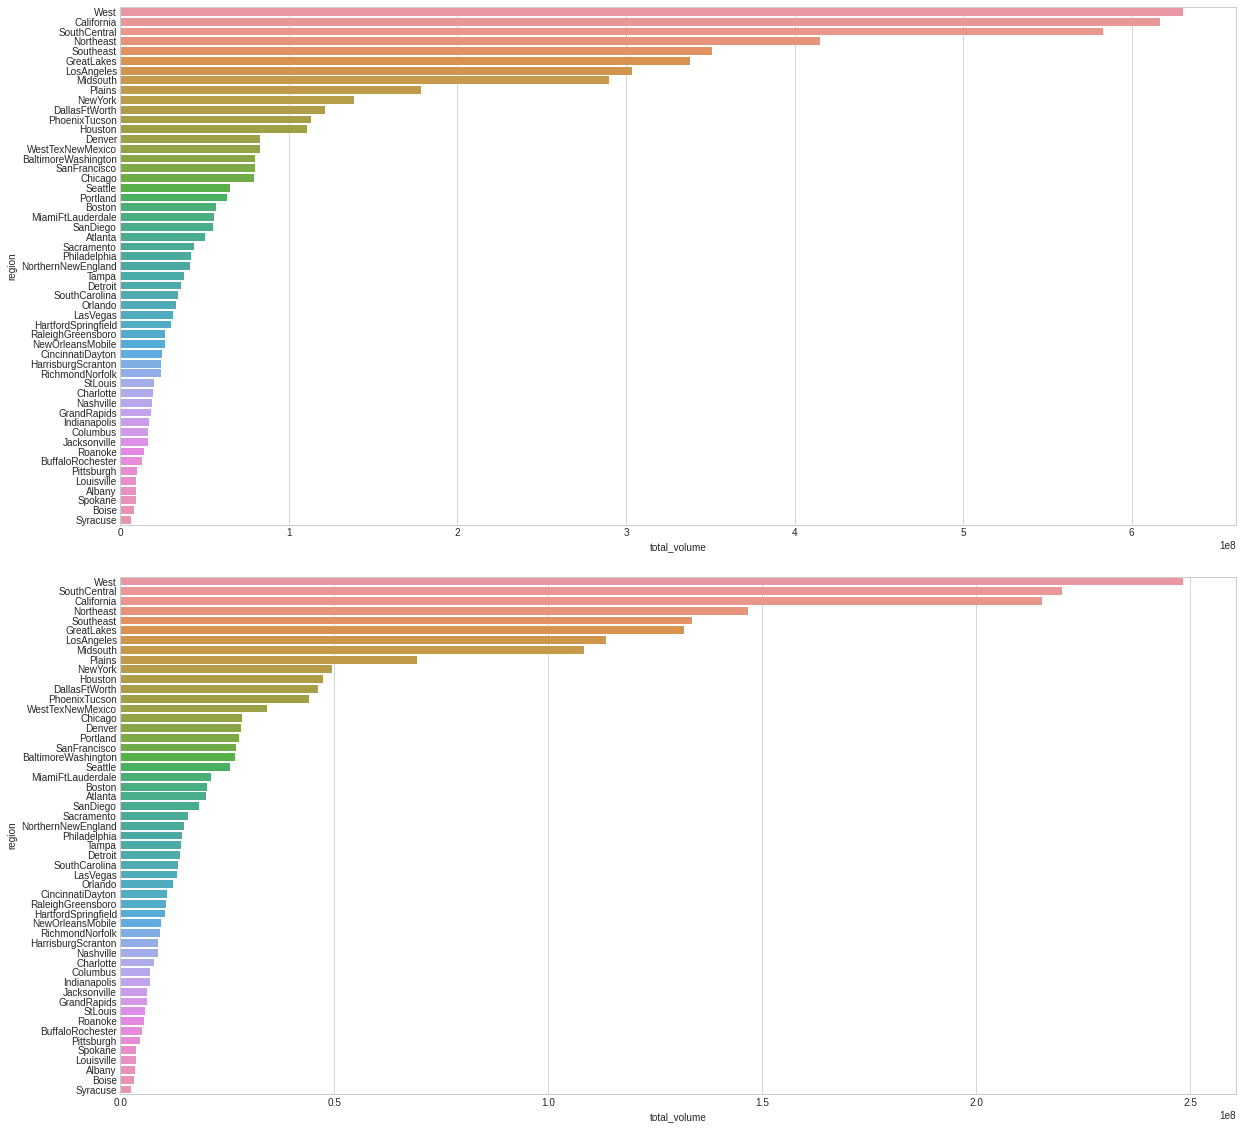

In [127]:
fig, axes = plt.subplots(2, 1, figsize=(20,20))
plt.subplots_adjust(hspace = .1)
sns.barplot(x="total_volume", y=df_volume_per_region_train["region"].iloc[1:], data=df_volume_per_region_train, ax=axes[0])

sns.barplot(x="total_volume", y=df_volume_per_region_val["region"].iloc[1:], data=df_volume_per_region_val, ax=axes[1]);

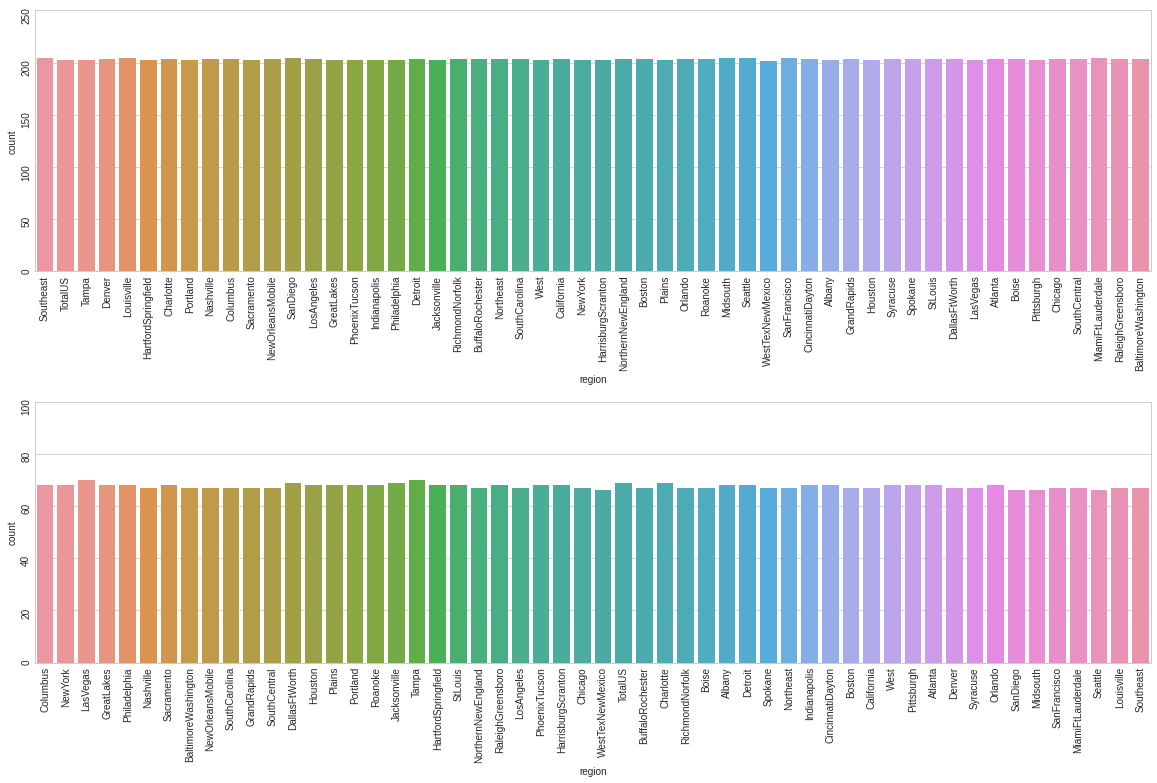

In [81]:
# Entries per region
fig, axes = plt.subplots(2, 1, figsize=(20,12))
plt.subplots_adjust(hspace = .5)
df_regions = df_train["region"].value_counts()
axes[0].set_ylim(0,250)
axes[0].tick_params(labelrotation=90)
sns.countplot(x="region", data = df_train, ax=axes[0]);

df_regions = df_val["region"].value_counts()
axes[1].set_ylim(0,100)
axes[1].tick_params(labelrotation=90)
sns.countplot(x="region", data = df_val, ax=axes[1]);

In [33]:
df_regions

Tampa                  70
LasVegas               70
Charlotte              69
DallasFtWorth          69
TotalUS                69
Jacksonville           69
CincinnatiDayton       68
Albany                 68
NewYork                68
HartfordSpringfield    68
HarrisburgScranton     68
PhoenixTucson          68
Detroit                68
Pittsburgh             68
RaleighGreensboro      68
Atlanta                68
StLouis                68
West                   68
Columbus               68
Indianapolis           68
Sacramento             68
Portland               68
Plains                 68
Houston                68
GreatLakes             68
Philadelphia           68
Orlando                68
Roanoke                68
Louisville             67
Boston                 67
Northeast              67
California             67
MiamiFtLauderdale      67
Syracuse               67
Denver                 67
SanFrancisco           67
Southeast              67
Spokane                67
SouthCentral

In [83]:
df_regions.sort_values(ascending=False)

Tampa                  70
LasVegas               70
Charlotte              69
DallasFtWorth          69
TotalUS                69
Jacksonville           69
West                   68
Orlando                68
Philadelphia           68
GreatLakes             68
Houston                68
Plains                 68
Portland               68
Sacramento             68
Indianapolis           68
Columbus               68
Roanoke                68
StLouis                68
RaleighGreensboro      68
Pittsburgh             68
Detroit                68
PhoenixTucson          68
HarrisburgScranton     68
HartfordSpringfield    68
NewYork                68
Albany                 68
CincinnatiDayton       68
Atlanta                68
GrandRapids            67
NewOrleansMobile       67
SouthCarolina          67
Boise                  67
RichmondNorfolk        67
NorthernNewEngland     67
LosAngeles             67
Chicago                67
BuffaloRochester       67
Nashville              67
BaltimoreWas

In [34]:
df_regions_percent = (df_regions / len(df_train))*100
df_regions_percent

Tampa                  0.639328
LasVegas               0.639328
Charlotte              0.630195
DallasFtWorth          0.630195
TotalUS                0.630195
Jacksonville           0.630195
CincinnatiDayton       0.621061
Albany                 0.621061
NewYork                0.621061
HartfordSpringfield    0.621061
HarrisburgScranton     0.621061
PhoenixTucson          0.621061
Detroit                0.621061
Pittsburgh             0.621061
RaleighGreensboro      0.621061
Atlanta                0.621061
StLouis                0.621061
West                   0.621061
Columbus               0.621061
Indianapolis           0.621061
Sacramento             0.621061
Portland               0.621061
Plains                 0.621061
Houston                0.621061
GreatLakes             0.621061
Philadelphia           0.621061
Orlando                0.621061
Roanoke                0.621061
Louisville             0.611928
Boston                 0.611928
Northeast              0.611928
Californ

**Notes:**
* Number of avocados per region is relatively equal

**Avocados per ```type```**

In [35]:
# Number of avocados per type
df_type = df_train["type"].value_counts()
df_type_percent = (df_type / len(df_train))*100
df_type_percent

conventional    50.022833
organic         49.977167
Name: type, dtype: float64

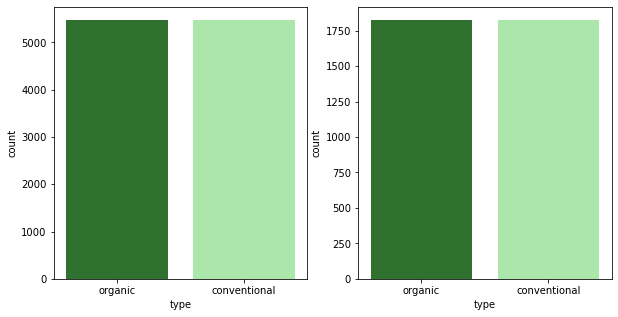

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='type', data=df_train, palette=["darkgreen", "lightgreen"], alpha=0.85, ax=axes[0]);
sns.countplot(x='type', data=df_val, palette=["darkgreen", "lightgreen"], alpha=0.85, ax=axes[1]);

**Notes:**
* The number of avocados per type is equally distributed

**Analyze PLUs**

In [137]:
df_train.head()

,index,date,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,11569,2015-01-04,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,11829,2015-01-04,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
2,11777,2015-01-04,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
3,675,2015-01-04,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
4,1247,2015-01-04,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville


In [155]:
# Number of avocados per PLU 4046 (total_volume)
df_volume_per_4046_train = pd.DataFrame(df_train.groupby("type")["4046"].mean())
df_volume_per_4046_train.T

type,conventional,organic
4046,570926.868532,7877.227999


In [156]:
# Number of avocados per PLU 4046 (total_volume)
df_volume_per_4046_val = pd.DataFrame(df_val.groupby("type")["4046"].mean())
df_volume_per_4046_val.T

type,conventional,organic
4046,607652.462986,7248.254745


In [157]:
# Number of avocados per PLU 4225 (total_volume)
df_volume_per_4225_train = pd.DataFrame(df_train.groupby("type")["4225"].mean())
df_volume_per_4225_train.T

type,conventional,organic
4225,598194.110398,15110.418529


In [158]:
# Number of avocados per PLU 4225 (total_volume)
df_volume_per_4225_val = pd.DataFrame(df_val.groupby("type")["4225"].mean())
df_volume_per_4225_val.T

type,conventional,organic
4225,560589.745775,17599.761485


In [159]:
# Number of avocados per PLU 4770 (total_volume)
df_volume_per_4770_train = pd.DataFrame(df_train.groupby("type")["4770"].mean())
df_volume_per_4770_train.T

type,conventional,organic
4770,54240.985823,353.79513


In [160]:
# Number of avocados per PLU 4770 (total_volume)
df_volume_per_4770_val = pd.DataFrame(df_val.groupby("type")["4770"].mean())
df_volume_per_4770_val.T

type,conventional,organic
4770,35928.422795,204.203145


In [184]:
df_plu_train = pd.concat([df_volume_per_4046_train, df_volume_per_4225_train, df_volume_per_4770_train], axis=1)
df_plu_train

,4046,4225,4770
type,,,
conventional,570926.868532,598194.110398,54240.985823
organic,7877.227999,15110.418529,353.795130


In [182]:
df_plu_val = pd.concat([df_volume_per_4046_val, df_volume_per_4225_val, df_volume_per_4770_val], axis=1)
df_plu_val

,4046,4225,4770
type,,,
conventional,607652.462986,560589.745775,35928.422795
organic,7248.254745,17599.761485,204.203145


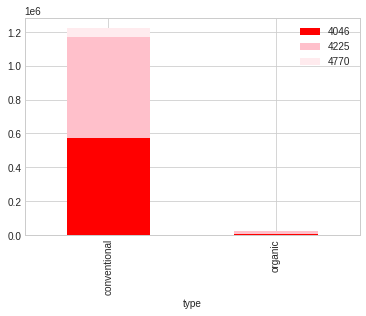

In [185]:
df_plu_train.plot(kind='bar', stacked=True, color=['red', 'pink', '#FFEBEE']);

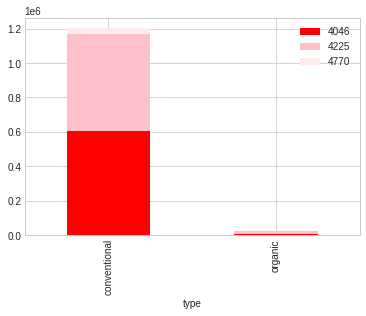

In [186]:
df_plu_val.plot(kind='bar', stacked=True, color=['red', 'pink', '#FFEBEE']);

# Modeling

* Predicting the price is a regression problem
* Use RMSE as metric
* Compare the following models:
    * Linear Regression
    * Decision Tree
    * Random Forest
    * XGBoost
    * AdaBoost
* Baseline: Predict the mean (of the training data) - Waht is the Metric

## hyperparameter tuning

# Other

* Export as script
* Docker
* Flask